In [9]:
%load_ext autoreload
%autoreload 2
import pytest
import tifffile as tff
import fibsem.fibsemImage as fb
import numpy as np
import os
from fibsem.structures import BeamType, GammaSettings, ImageSettings




def test_metadata():
    array1 = np.random.rand(256,256)
    from matplotlib import pyplot as plt
    plt.imshow(array1, interpolation='nearest')
    plt.show()    
    gamma_dict = {
        "enabled": True,
        "min_gamma": 0.5,
        "max_gamma": 1.8,
        "scale_factor": 0.01,
        "threshold": 46
    }
    Image_settings = {
        "resolution": "1536x1024",
        "dwell_time": 1.e-6,
        "hfw": 150.e-6,
        "autocontrast": True,
        "beam_type": "ELECTRON", 
        "gamma": gamma_dict,
        "save": False,
        "save_path": "path",
        "label": "label"
    }

    metadata = fb.Metadata(
            image_settings = ImageSettings.__from_dict__(Image_settings)
        )
    img = fb.fibsemImage(array1, metadata)
    img.save_to_TIFF('test.tif')
    img.load_from_TIFF('test.tif')
    plt.imshow(img.data, interpolation='nearest')
    plt.show() 
    print(img.metadata)
    pass




The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


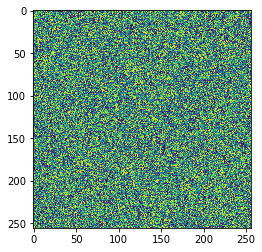

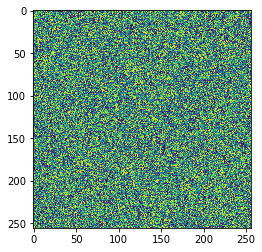

Metadata(image_settings=ImageSettings(resolution='1536x1024', dwell_time=1e-06, hfw=0.00015, autocontrast=True, beam_type=<BeamType.ELECTRON: 1>, save=False, label='label', gamma=GammaSettings(enabled=True, min_gamma=0.5, max_gamma=1.8, scale_factor=0.01, threshold=46), save_path='path'))


In [10]:
test_metadata()